In [1]:
%load_ext notexbook

In [2]:
%texify -fs 18

# Preamble: Suggested Reference

The wonderful (online) book entitled **Programming Differential Privacy**, _Differential privacy, for programmers_ is a great resource to start.

The book is intended to give you an introduction to the challenges of data privacy, introducing the techniques that have been developed for addressing those challenges, and help you understand how to implement some of those techniques. 

(from _Introdution_ Chapter):

> This book assumes a working knowledge of Python, as well as basic knowledge of the `pandas` and NumPy libraries. 
> You will also benefit from some background in discrete mathematics and probability - a basic undergraduate course in these topics should be more than sufficient.

**Source**: 

- (HTML Version): [programming-dp.com](https://programming-dp.com)
- (GitHub): [github.com/uvm-plaid/programming-dp](https://github.com/uvm-plaid/programming-dp)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patheffects as path_effects
plt.style.use('seaborn-whitegrid')

In [2]:
ys1 = [np.random.laplace(loc=0, scale=1) for _ in range(10000)]
ys2 = [np.random.laplace(loc=1, scale=1) for _ in range(10000)]

In [3]:
import matplotlib
f = matplotlib.font_manager.FontProperties(family='Roboto', weight='bold')

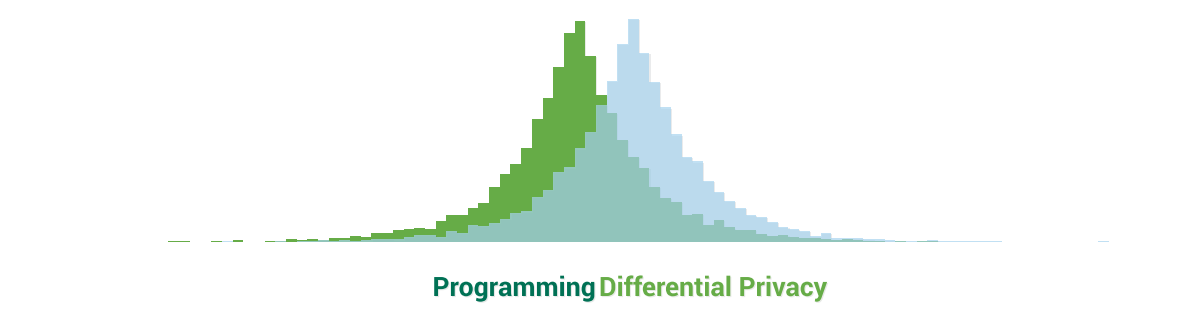

In [4]:
plt.figure(figsize=(15, 4), dpi=80)
_, bins, _ = plt.hist(ys1, bins=100, color='#66AC47',
                     path_effects=[path_effects.withSimplePatchShadow(alpha=.1, offset=(1,-1))])

plt.hist(ys2, bins=bins, alpha=.7, color='#A7D4EE',
        path_effects=[path_effects.withSimplePatchShadow(alpha=.1, offset=(1,-1))])

plt.axis('off');
plt.grid('off');

plt.text(-2.6, -220, 'Programming', fontproperties=f, fontsize=24, 
         color='#007155', 
         path_effects=[path_effects.withSimplePatchShadow(offset=(1, -1), alpha=.1)])

plt.text(0.4, -220, 'Differential Privacy', fontproperties=f, fontsize=24, color='#66AC47',
         path_effects=[path_effects.withSimplePatchShadow(offset=(1, -1), alpha=.1)])

plt.tight_layout()

#### Shameless Plug

You may find a working introduction to `DP` (as compared to the more popular `K-Anonymity` method) in the first part of this tutorial [privacy-preserving-data-science/programming-privacy](https://nbviewer.org/github/leriomaggio/privacy-preserving-data-science/tree/main/1-programming-privacy/)

## Introducing Opacus

![](https://opacus.ai/img/opacus_logo_vertical.svg)

[Opacus](https://opacus.ai/) is the framework in the PyTorch ecosystem that brings **Differential Privacy** to (PyTorch) Model Training


(from [Introducing Opacus](https://ai.facebook.com/blog/introducing-opacus-a-high-speed-library-for-training-pytorch-models-with-differential-privacy/))

 
> `Opacus` (_is_) a new high-speed library for training PyTorch models with differential privacy (DP) that’s more scalable than existing state-of-the-art methods. 
>
> Differential privacy is a mathematically rigorous framework for quantifying the anonymization of sensitive data. 
>
> It’s often used in analytics, with growing interest in the machine learning (ML) community. 

Let's have a look at how `Opacus` effectively integrated DP (i.e. `DP-SGD`)